<a href="https://colab.research.google.com/github/nampallyharish4/SIEM-System-Using-AI-and-LLMs/blob/main/siem_anomaly_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np

# Simulate 50 minutes of normal login attempt counts (around 5 per minute on average)
np.random.seed(42)  # for reproducible example
normal_counts = np.random.poisson(lam=5, size=50)

# Simulate anomaly: a spike in login attempts (e.g., an attacker tries 30+ times in a minute)
anomalous_counts = np.array([30, 40, 50])

# Combine the data
login_attempts = np.concatenate([normal_counts, anomalous_counts])
print("Login attempts per minute:", login_attempts)

Login attempts per minute: [ 5  4  4  5  5  3  5  4  6  7  2  5  5  6  4  6  6  1  7  2 11  4  3  8
  3  3  5  8  3  2  5  3  8 10  3  2  5  7  6  6  2  4  9  7 11  8  3  2
  3  4 30 40 50]


In [18]:
import pandas as pd
logs = [
    "2025-03-06 08:00:00, INFO, User login success, user: admin",
    "2025-03-06 08:01:23, INFO, User login success, user: alice",
    "2025-03-06 08:02:45, ERROR, Failed login attempt, user: alice",
    # ... (more log lines)
]
parsed_logs = []
for line in logs:
    parts = [p.strip() for p in line.split(",")]
    timestamp = parts[0]
    level = parts[1]
    message = parts[2]
    user = parts[3].split(":")[1].strip() if "user:" in parts[3] else None
    parsed_logs.append({"timestamp": timestamp, "level": level, "message": message, "user": user})

# Convert to DataFrame for easier analysis
df_logs = pd.DataFrame(parsed_logs)
print(df_logs.head())

             timestamp  level               message   user
0  2025-03-06 08:00:00   INFO    User login success  admin
1  2025-03-06 08:01:23   INFO    User login success  alice
2  2025-03-06 08:02:45  ERROR  Failed login attempt  alice


In [19]:
from sklearn.ensemble import IsolationForest

# Prepare the data in the shape the model expects (samples, features)
X = login_attempts.reshape(-1, 1)  # each sample is a 1-dimensional [count]

# Initialize the Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42)
# contamination=0.05 means we expect about 5% of the data to be anomalies

# Train the model on the data
model.fit(X)

IsolationForest(contamination=0.05, random_state=42)

In [20]:
# Use the model to predict anomalies
labels = model.predict(X)
# The model outputs +1 for normal points and -1 for anomalies

# Extract the anomaly indices and values
anomaly_indices = np.where(labels == -1)[0]
anomaly_values = login_attempts[anomaly_indices]

print("Anomaly indices:", anomaly_indices)
print("Anomaly values (login attempts):", anomaly_values)

Anomaly indices: [50 51 52]
Anomaly values (login attempts): [30 40 50]


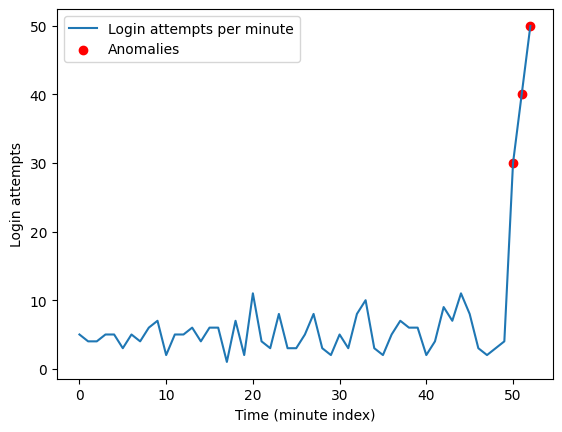

In [21]:
import matplotlib.pyplot as plt

plt.plot(login_attempts, label="Login attempts per minute")
plt.scatter(anomaly_indices, anomaly_values, color='red', label="Anomalies")
plt.xlabel("Time (minute index)")
plt.ylabel("Login attempts")
plt.legend()
plt.show()

In [30]:
if len(anomaly_indices) > 0:
    print(f"Alert! Detected {len(anomaly_indices)} anomalous events. Initiating response procedures...")
    # Here, you could add code to disable a user or notify an admin, etc.

Alert! Detected 3 anomalous events. Initiating response procedures...
